# Imports

In [13]:
import datetime as dt
import os
import pandas as pd

import sys
sys.path.insert(0, os.environ.get('SRC_FIGMA_PATH'))

from cryptocurrencyetl import CryptocurrencyEtl
import resources.context as c
from resources.dataanalysis import DataAnalysis
from resources.dataanalysis import DataTransform

# 1.0. Data Extraction

In [14]:
# extract any cryptocurrency historical data to analysis
crypto = 'BTC'
market_curr = 'USD'
api_key = os.environ.get('TOKEN_FIGMA_CRYPTO_KEY')

crypt_etl = CryptocurrencyEtl(crypto=crypto, market_curr=market_curr, api_key=api_key)

#crypt_etl.test_market_curr()
#crypt_etl.test_crypto()

df_btc_usd = crypt_etl.run()

2022-06-20 20:24:22,257 (INFO)	||| Initing extract of ETL to obtain BTC historical data in USD value!
2022-06-20 20:24:24,429 (INFO)	||| Initing data transform of BTC historical data!
2022-06-20 20:24:24,434 (INFO)	||| ETL finished!


In [15]:
# use standard dataset to test notebook's code
df_btc_usd.to_csv(c.DATA_INT_FLD / 'test_df.csv')
#df_btc_usd = pd.read_csv(c.DATA_PROC_FLD / 'btc_usd_proc.csv')

# 2.0. Data Analysis

In [4]:
analy = DataAnalysis(df_btc_usd, date_col='timestamp', individual_figsize=(18, 8), start_date='2021-01-01')

## 2.1. Statistical Description

In [5]:
fig_path = c.FIG_FLD / 'crypto_analysis/btc_statistical_description_test.png'
analy.statistical_description(saving_figloc=fig_path)

[0620/195553.235300:ERROR:sandbox_linux.cc(378)] InitializeSandbox() called with multiple threads in process gpu-process.
[0620/195553.523904:INFO:headless_shell.cc(653)] Written to file /tmp/tmpcvydp5ul/temp.png.


,attributes,mean,median,std,min,max,range,skew,kurtosis
0,open,44353.840709,43160.450000,9868.109793,18970.79000,67525.820000,48555.030000,0.190245,-0.666741
1,high,45625.996940,44273.920000,10009.362120,20687.99000,69000.000000,48312.010000,0.172384,-0.669614
2,low,42856.468190,42116.310000,9747.457596,17622.00000,66222.400000,48600.400000,0.174132,-0.638968
3,close,44337.815261,43160.450000,9900.783617,18970.79000,67525.830000,48555.040000,0.173228,-0.641058
4,volume,65590.404073,55153.769573,39023.639810,3897.62855,354347.243161,350449.614611,2.382104,9.166502


## 2.2. Temporal Estability

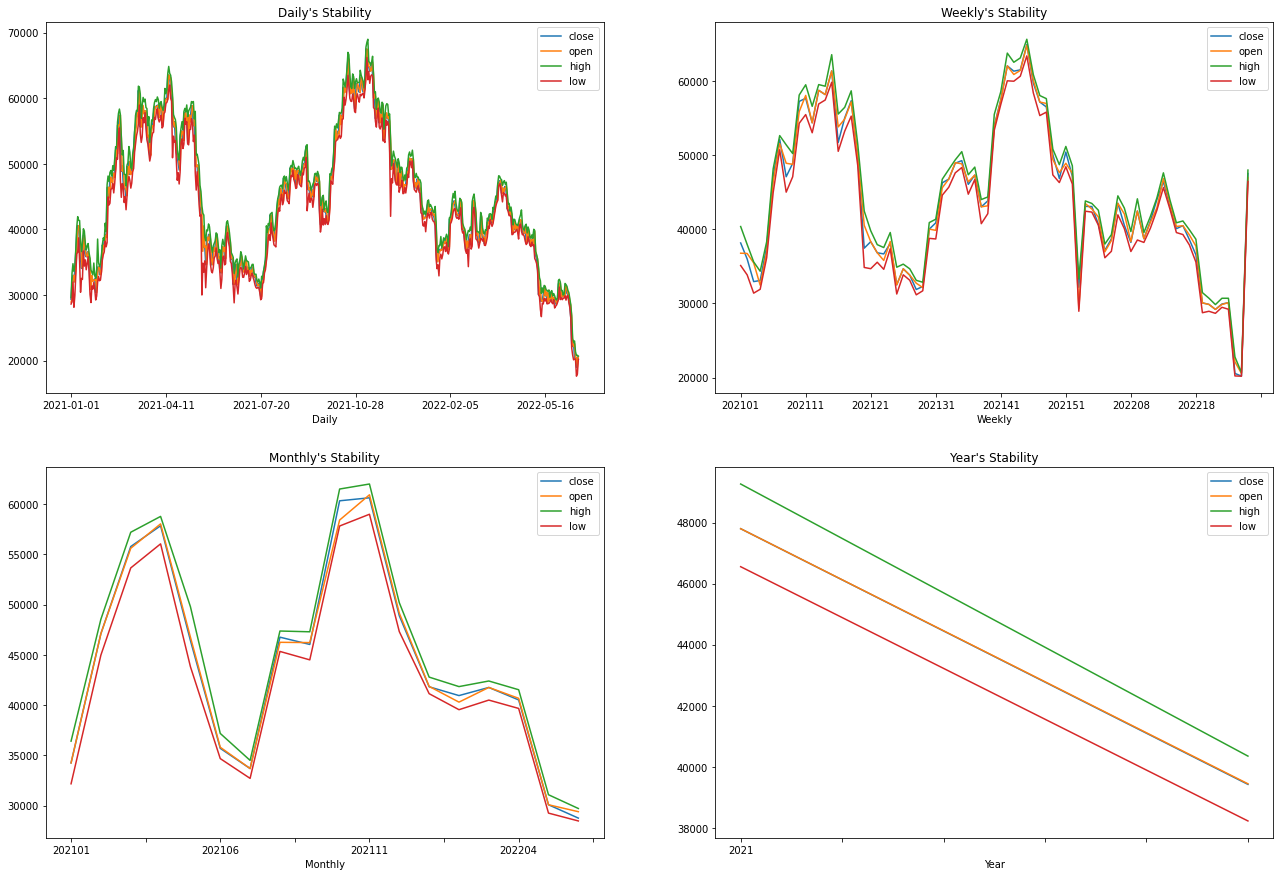

In [6]:
fig_path = c.FIG_FLD / 'crypto_analysis/btc_stability_all.jpg'
analy.all_timely_stability(y=['close', 'open', 'high', 'low'], saving_figloc=fig_path)

## 2.3. Outlier Identification

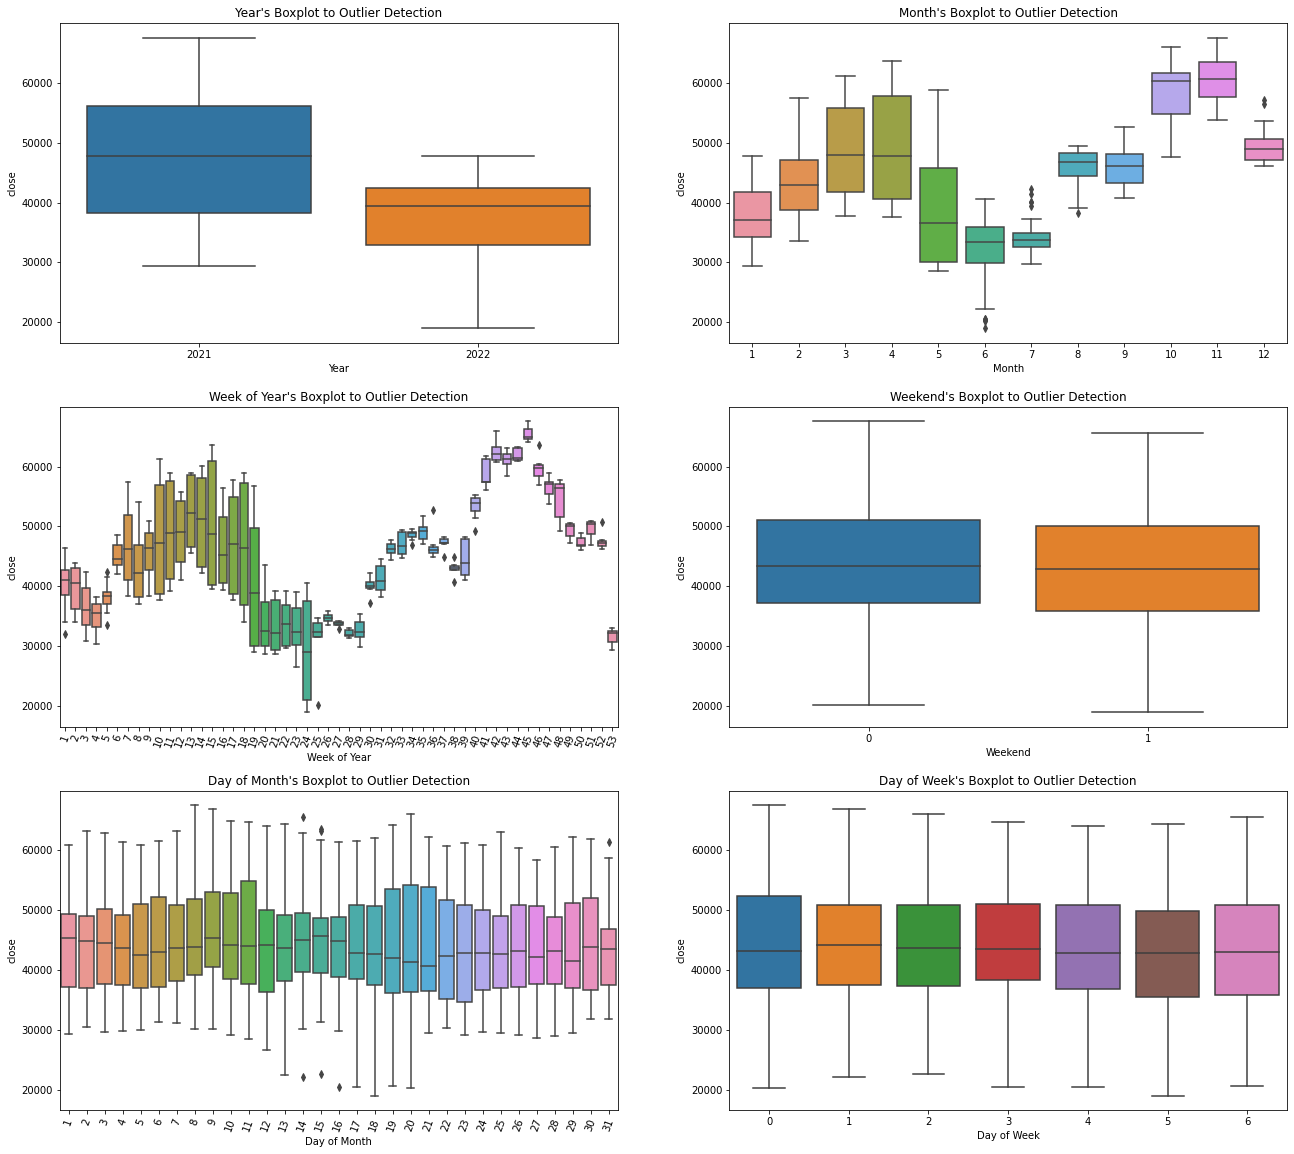

In [7]:
fig_path = c.FIG_FLD / 'crypto_analysis/btc_outlier_detector_all.jpg'
analy.all_temporal_outlier_detector_boxplots(y='close', saving_figloc=fig_path)

## 2.4. Distribution

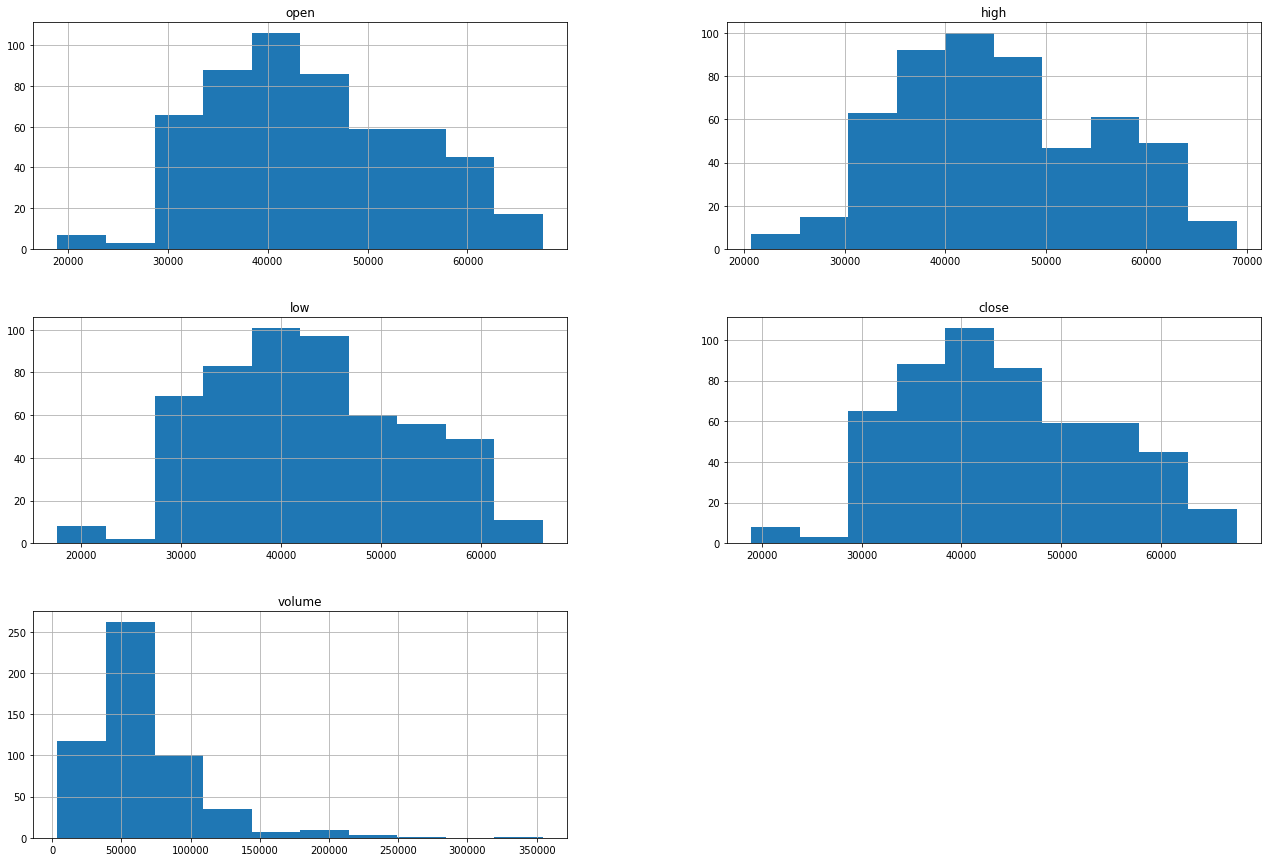

In [8]:
fig_path = c.FIG_FLD / 'crypto_analysis/btc_distribution_check.jpg'
analy.distribution_check(saving_figloc=fig_path)

## 2.5. Nature Transformation Effect

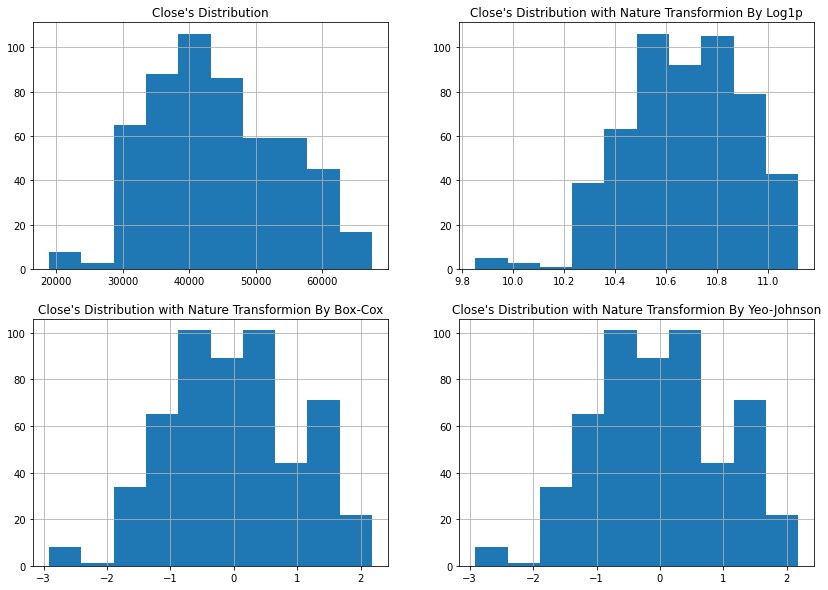

In [9]:
fig_path = c.FIG_FLD / 'crypto_analysis/btc_nature_transformation_check.jpg'
analy.nature_transform_effect_check(y='close', all_figsize=(14, 10), saving_figloc=fig_path)

# 3.0. Data Preparation

In [10]:
transforming_df = DataTransform(df=df_btc_usd, date_col='timestamp', individual_figsize=(18, 8), start_date='2021-01-01')
df1, scaler = transforming_df.prepare_dataframe_timeseries(y='open', method='log1p')

2022-06-20 19:55:59,040 (WARNING)	||| The mean difference is below 0.001! (difference = 1.6289457345186773e-13)


# 4.0. Machine Learning Model

## 4.1. SARIMAX

### 4.1.1. Modeling

### 4.1.2. Validation

## 4.2. ARIMA

### 4.2.1. Modeling

In [11]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [12]:
df2['rolling_mean_diff'].dropna()

NameError: name 'df2' is not defined

In [ ]:
dftest = adfuller(df2['rolling_mean_diff'].dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.591144016431777
2. P-Value :  0.005932609762980111
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 511
5. Critical Values :
	 1% :  -3.4432119442564324
	 5% :  -2.8672126791646955
	 10% :  -2.569791324979607


In [ ]:
df2 = pd.DataFrame(df1)

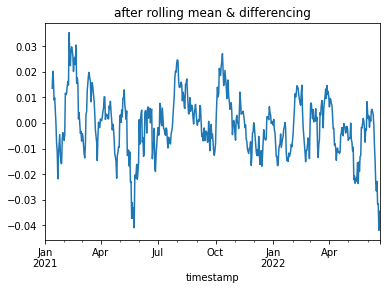

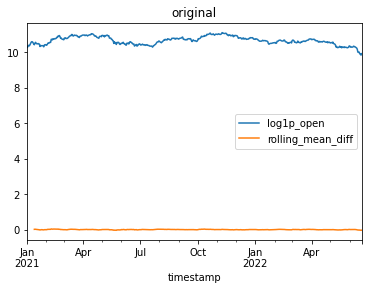

In [ ]:
rolling_mean = df2['log1p_open'].rolling(window = 12).mean()
df2['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
df2['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
df2.plot(title='original');

### 4.2.2. Validation

## 4.3. Saving Model